In [1]:
# 利用transitions，TD既可以差分更新V，也可以差分更新Q
# 只不过需要多选择一个a'，不同的选择诞生了很多种算法

# 在每一个episode和一系列episodes之中，agent随时改变策略，与环境进行交互

In [2]:
# https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py  # 左、下、右、上

# https://github.com/boyu-ai/Hands-on-RL

In [3]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

import copy
import matplotlib.pyplot as plt  # https://matplotlib.org/stable/index.html#
import numpy as np
import random

In [4]:
###

In [5]:
def equiprobability_policy(env) :

    pi = np.ones( [env.observation_space.n, env.action_space.n] )  # 16x4

    pi = pi * (1/env.action_space.n)

    return pi

In [6]:
class agent_sarsa :


    def __init__(self, env, pi, epsilon=0.10, gamma=0.98, alpha=0.05) :

        self.env     = env  # 只读取env属性，不作写入和交互
        self.pi      = pi
        self.epsilon = epsilon
        self.gamma   = gamma
        self.alpha   = alpha

        self.Q       = np.zeros( [self.env.observation_space.n, self.env.action_space.n] )


    def Q_evaluation(self, s, a, r, s_, a_) :

        td_error = r+self.gamma*self.Q[s_, a_] - self.Q[s, a]
        self.Q[s, a] += self.alpha * td_error

        return self.Q


    def policy_improvement(self) :

        maxQ = np.max(self.Q, axis=1)

        for s in range(self.env.observation_space.n) :
            q_cnt = 0

            for a in range(self.env.action_space.n) :
                if self.Q[s, a] == maxQ[s] :  # 至少有1
                    q_cnt += 1

            for a in range(self.env.action_space.n) :
                if self.Q[s, a] == maxQ[s] :
                    self.pi[s, a] = self.epsilon/self.env.action_space.n + \
                                    ( (1-self.epsilon)/q_cnt )
                else :
                    self.pi[s, a] = self.epsilon/self.env.action_space.n

        return self.pi


    def step(self, obs) :

        act = np.random.choice(self.env.action_space.n, p=self.pi[obs])

        return act

In [7]:
class agent_Qlearning :


    def __init__(self, env, pi, epsilon=0.10, gamma=0.98, alpha=0.05) :

        self.env     = env  # 只读取env属性，不作写入和交互
        self.pi      = pi
        self.epsilon = epsilon
        self.gamma   = gamma
        self.alpha   = alpha

        self.Q       = np.zeros( [self.env.observation_space.n, self.env.action_space.n] )


    def Q_evaluation(self, s, a, r, s_) :

        td_error = r+self.gamma*self.Q[s_].max() - self.Q[s, a]
        self.Q[s, a] += self.alpha * td_error

        return self.Q


    def policy_improvement(self) :

        maxQ = np.max(self.Q, axis=1)

        for s in range(self.env.observation_space.n) :
            q_cnt = 0

            for a in range(self.env.action_space.n) :
                if self.Q[s, a] == maxQ[s] :  # 至少有1
                    q_cnt += 1

            for a in range(self.env.action_space.n) :
                if self.Q[s, a] == maxQ[s] :
                    self.pi[s, a] = self.epsilon/self.env.action_space.n + \
                                    ( (1-self.epsilon)/q_cnt )
                else :
                    self.pi[s, a] = self.epsilon/self.env.action_space.n

        return self.pi


    def step(self, obs) :

        act = np.random.choice(self.env.action_space.n, p=self.pi[obs])

        return act

In [8]:
###

In [9]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
# gym.make('FrozenLake-v1', desc=generate_random_map(size=8))

# obs, _ = env.reset(seed=42)
obs, _ = env.reset()
# print(obs)
# print(_)

pi = equiprobability_policy(env)
# print(pi)

agent_1 = agent_sarsa(env, pi)
agent_2 = agent_Qlearning(env, pi)

200
0.025
400
0.0375
600
0.035
800
0.0125
1000
0.03
1200
0.029166666666666667
1400
0.03785714285714286
1600
0.128125
1800
0.03111111111111111
2000
0.088
2200
0.08363636363636363
2400
0.21916666666666668
2600
0.24461538461538462
2800
0.05142857142857143
3000
0.117
3200
0.1328125
3400
0.19852941176470587
3600
0.17583333333333334
3800
0.17289473684210527
4000
0.25225
4200
0.2914285714285714
4400
0.1393181818181818
4600
0.21304347826086956
4800
0.33979166666666666
5000
0.1966
5200
0.26942307692307693
5400
0.3011111111111111
5600
0.30410714285714285
5800
0.10155172413793104
6000
0.1325
6200
0.2540322580645161
6400
0.2578125
6600
0.2686363636363636
6800
0.27602941176470586
7000
0.2875714285714286
7200
0.25763888888888886
7400
0.3344594594594595
7600
0.2743421052631579
7800
0.3341025641025641
8000
0.329
8200
0.2995121951219512
8400
0.3163095238095238
8600
0.1466279069767442
8800
0.2796590909090909
9000
0.3002222222222222
9200
0.31293478260869567
9400
0.19606382978723405
9600
0.29625
9800
0.20

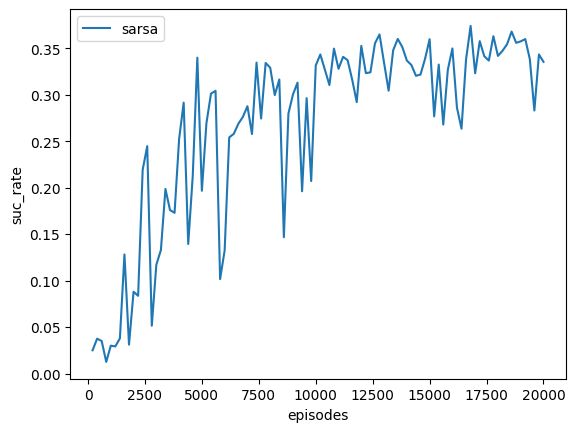

In [10]:
episodes_ary  = np.arange(200, 20001, 200)
suc_rate_list = []


for episodes_num in episodes_ary :

    agent_1.Q  = agent_1.Q*0
    agent_1.pi = pi

    suc_cnt    = 0
    for episodes_cnt in range(episodes_num) :

        obs, _ = env.reset()
        act    = agent_1.step(obs)

        while True :

            # 交互
            obs_, reward, terminated, truncated, _ = env.step(act)


            # 为什么不根据已经到达的新状态和回报，进行当前策略的修正后，再选择并执行下一步动作
            # 因为下一步动作没有选择，没有Q值依据，就无法对当前Q表进行更新，无法生成新的策略
            # （假设虚拟选择，获取Q值，但不执行？要依据什么策略选择？假设每个动作，都会考虑被选择？）

            act_v = agent_1.step(obs_)  # 用待估计的策略，进行虚拟选择，SARSA使用被生成的行为策略选择
            act_r = agent_1.step(obs_)  # 真实执行的行为策略，进行实际动作选择，SARSA使用epsilon-G

            # 虚拟选择的动作，获得Q值依据，进行Q表更新
            agent_1.Q_evaluation(obs, act, reward, obs_, act_v)

            # 根据更新的Q表，生成新的行为策略
            agent_1.policy_improvement()

            # 为什么不用新生成的策略，来指导当前状态下的动作act_r
            # act_r = agent_1.step(obs_)在agent_1.policy_improvement()之后？
            # 不同的虚拟选择act_v，会导致不同的Q表更新，从而生成不同的新策略
            # 如果新策略，在当前状态下的动作选择，与起初的虚拟选择不一致？
            # 因果不统一


            # 下一状态转移
            obs = obs_

            # 下一动作转移
            act = act_r


            if terminated or truncated :
                if reward == 1 :
                    suc_cnt += 1
                break


    suc_rate = suc_cnt / episodes_num

    print(episodes_num)
    print(suc_rate)
    suc_rate_list.append(suc_rate)


print(agent_1.Q)  # 估算的是epsilon-greedy策略的Q


fig = plt.figure()
plt.plot(episodes_ary, suc_rate_list, label='sarsa')
plt.xlabel('episodes')
plt.ylabel('suc_rate')
plt.legend()
plt.show()

200
0.01
400
0.0575
600
0.04
800
0.0325
1000
0.02
1200
0.0375
1400
0.115
1600
0.073125
1800
0.2388888888888889
2000
0.0465
2200
0.07363636363636364
2400
0.08583333333333333
2600
0.18461538461538463
2800
0.13428571428571429
3000
0.19566666666666666
3200
0.0621875
3400
0.11088235294117647
3600
0.12638888888888888
3800
0.24052631578947367
4000
0.0675
4200
0.17666666666666667
4400
0.16227272727272726
4600
0.20434782608695654
4800
0.15875
5000
0.2588
5200
0.2798076923076923
5400
0.2846296296296296
5600
0.31642857142857145
5800
0.268448275862069
6000
0.25133333333333335
6200
0.2567741935483871
6400
0.28421875
6600
0.3228787878787879
6800
0.22205882352941175
7000
0.287
7200
0.3540277777777778
7400
0.31027027027027027
7600
0.31644736842105264
7800
0.15705128205128205
8000
0.327125
8200
0.3408536585365854
8400
0.2633333333333333
8600
0.3127906976744186
8800
0.2922727272727273
9000
0.341
9200
0.3516304347826087
9400
0.31
9600
0.3251041666666667
9800
0.3092857142857143
10000
0.3021
10200
0.333333

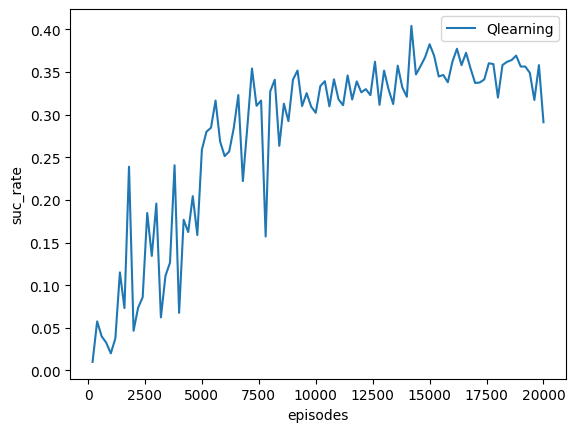

In [11]:
episodes_ary  = np.arange(200, 20001, 200)
suc_rate_list = []


for episodes_num in episodes_ary :

    agent_2.Q  = agent_2.Q*0
    agent_2.pi = pi

    suc_cnt    = 0
    for episodes_cnt in range(episodes_num) :

        obs, _ = env.reset()
        act    = agent_2.step(obs)

        while True :

            # 交互
            obs_, reward, terminated, truncated, _ = env.step(act)


            # 为什么不根据已经到达的新状态和回报，进行当前策略的修正后，再选择并执行下一步动作
            # 因为下一步动作没有选择，没有Q值依据，就无法对当前Q表进行更新，无法生成新的策略
            # （假设虚拟选择，获取Q值，但不执行？要依据什么策略选择？假设每个动作，都会考虑被选择？）

            # act_v = a_maxQ  # 用待估计的策略，进行虚拟选择，Qlearning使用greedy
            act_r = agent_2.step(obs_)  # 真实执行的行为策略，进行实际动作选择，Qlearning使用epsilon-G

            # 虚拟选择的动作，获得Q值依据，进行Q表更新
            agent_2.Q_evaluation(obs, act, reward, obs_)  # act_v

            # 根据更新的Q表，生成新的行为策略
            agent_2.policy_improvement()

            # 为什么不用新生成的策略，来指导当前状态下的动作act_r
            # act_r = agent_2.step(obs_)在agent_2.policy_improvement()之后？
            # 不同的虚拟选择act_v，会导致不同的Q表更新，从而生成不同的新策略
            # 如果新策略，在当前状态下的动作选择，与起初的虚拟选择不一致？
            # 因果不统一


            # 下一状态转移
            obs = obs_

            # 下一动作转移
            act = act_r


            if terminated or truncated :
                if reward == 1 :
                    suc_cnt += 1
                break


    suc_rate = suc_cnt / episodes_num

    print(episodes_num)
    print(suc_rate)
    suc_rate_list.append(suc_rate)


print(agent_2.Q)  # 估算的是epsilon-greedy策略的Q


fig = plt.figure()
plt.plot(episodes_ary, suc_rate_list, label='Qlearning')
plt.xlabel('episodes')
plt.ylabel('suc_rate')
plt.legend()
plt.show()

In [12]:
env.close()